In [11]:
#pip install yfinance

[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2020-01-02  72.796021  75.087502  75.150002  73.797501  74.059998  135480400
2020-01-03  72.088303  74.357498  75.144997  74.125000  74.287498  146322800
2020-01-06  72.662712  74.949997  74.989998  73.187500  73.447502  118387200
2020-01-07  72.320976  74.597504  75.224998  74.370003  74.959999  108872000
2020-01-08  73.484352  75.797501  76.110001  74.290001  74.290001  132079200


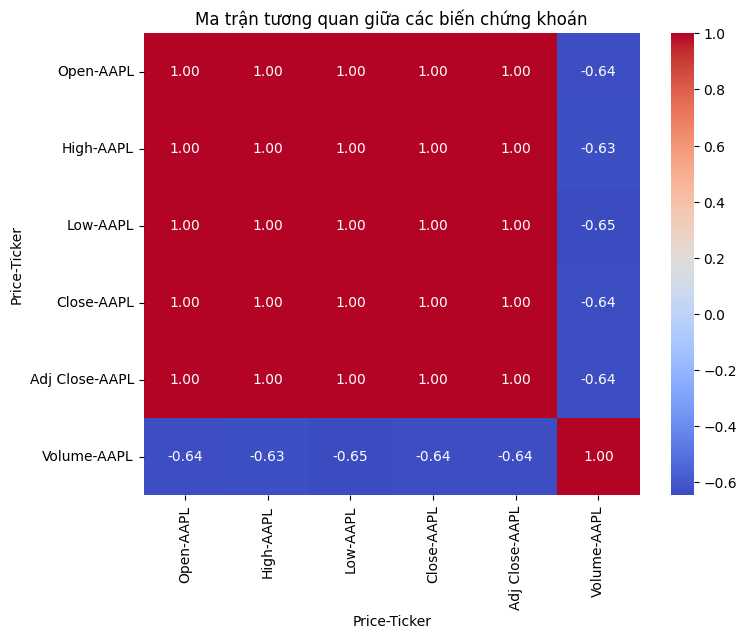

In [24]:
# import yfinance as yf

# # Tải dữ liệu cho mã ticker (ví dụ: Apple - AAPL)
# ticker = "AAPL"  # Thay bằng mã của công ty bạn muốn
# data = yf.download(ticker, start="2020-01-01", end="2024-12-31")

# # Hiển thị dữ liệu
# print(data.head())

# # Lưu dữ liệu vào file CSV
# data.to_csv('AAPL.csv')
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tải dữ liệu cho mã ticker (ví dụ: Apple - AAPL)
ticker = "AAPL"  # Thay bằng mã của công ty bạn muốn
data = yf.download(ticker, start="2020-01-01", end="2024-12-31")

# Hiển thị dữ liệu
print(data.head())

# Lưu dữ liệu vào file CSV
data.to_csv('AAPL.csv')

# Tính ma trận tương quan (chỉ sử dụng các cột số)
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Ma trận tương quan giữa các biến chứng khoán')
plt.show()



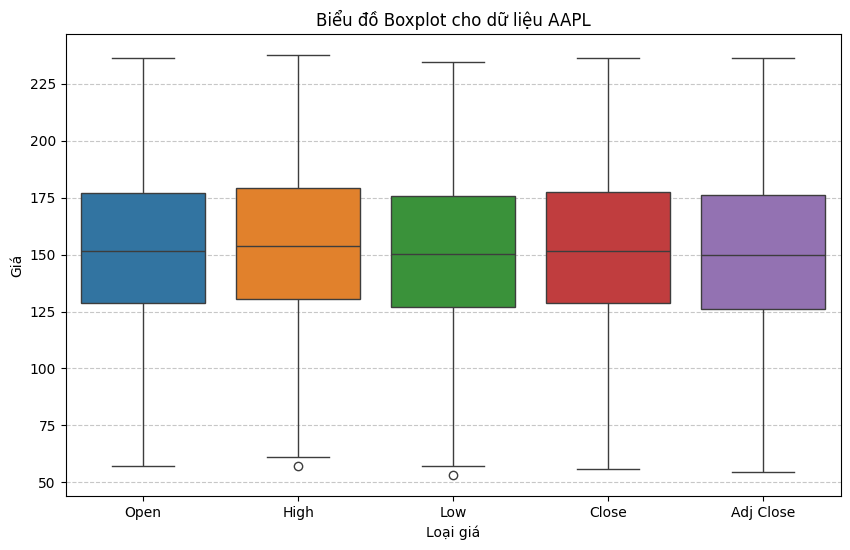

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Open', 'High', 'Low', 'Close', 'Adj Close']])

# Tùy chỉnh tiêu đề và nhãn
plt.title(f'Biểu đồ Boxplot cho dữ liệu {ticker}')
plt.ylabel('Giá')
plt.xlabel('Loại giá')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.show()

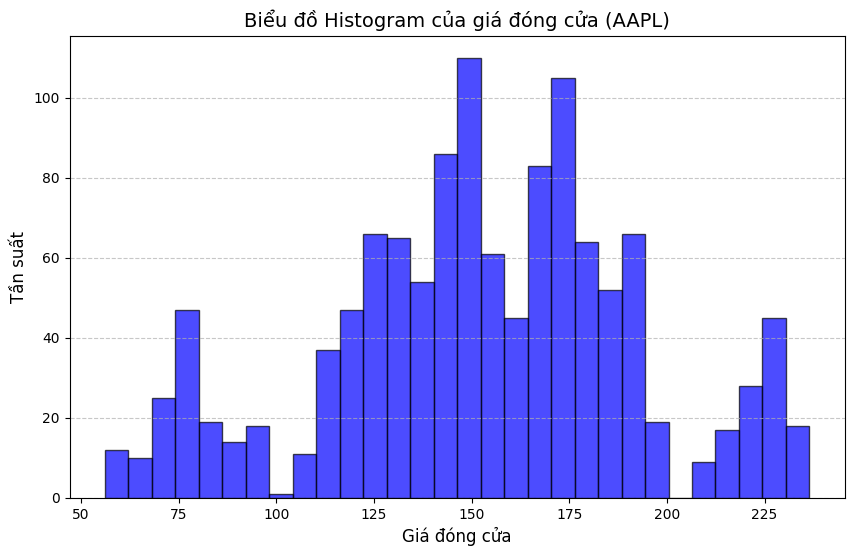

In [29]:
# Vẽ biểu đồ histogram cho cột 'Close' (giá đóng cửa)
plt.figure(figsize=(10, 6))
plt.hist(data['Close'], bins=30, color='blue', alpha=0.7, edgecolor='black')

# Tùy chỉnh biểu đồ
plt.title(f'Biểu đồ Histogram của giá đóng cửa ({ticker})', fontsize=14)
plt.xlabel('Giá đóng cửa', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.show()

In [27]:
# # Vẽ biểu đồ nến
# fig = go.Figure(data=[go.Candlestick(
#     x=data.index,
#     open=data['Open'],
#     high=data['High'],
#     low=data['Low'],
#     close=data['Close'],
#     increasing_line_color='green', decreasing_line_color='red'
# )])

# # Cài đặt tiêu đề và các thông số khác
# fig.update_layout(
#     title=f'Biểu đồ nến Nhật cho {ticker}',
#     xaxis_title='Ngày',
#     yaxis_title='Giá',
#     xaxis_rangeslider_visible=False  # Tắt range slider dưới biểu đồ
# )

# # Hiển thị biểu đồ
# fig.show()

# Kiểm tra dữ liệu rỗng
if data.empty:
    raise ValueError("Dữ liệu không khả dụng. Hãy kiểm tra mã ticker hoặc thời gian.")

# Loại bỏ ngày không có dữ liệu
data = data.dropna()

# Kiểm tra các cột cần thiết
required_columns = ['Open', 'High', 'Low', 'Close']
if not all(col in data.columns for col in required_columns):
    raise ValueError(f"Dữ liệu thiếu các cột cần thiết: {required_columns}")

# Vẽ biểu đồ nến
fig = go.Figure(data=[go.Candlestick(
    x=data.index,
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close'],
    increasing_line_color='green',
    decreasing_line_color='red'
)])

fig.update_layout(
    title=f'Biểu đồ nến Nhật cho {ticker}',
    xaxis_title='Ngày',
    yaxis_title='Giá',
    xaxis_rangeslider_visible=False
)

fig.show()

In [18]:
data.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02,72.796021,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,72.088287,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.662720,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,72.320992,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.484344,75.797501,76.110001,74.290001,74.290001,132079200
2020-01-09,75.045212,77.407501,77.607498,76.550003,76.809998,170108400
2020-01-10,75.214874,77.582497,78.167503,77.062500,77.650002,140644800
2020-01-13,76.821800,79.239998,79.267502,77.787498,77.910004,121532000


In [21]:
print(data.columns)  # Hiển thị danh sách cột



MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [ ]:
print(data.index)    # Hiển thị chỉ mục

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2024-11-11', '2024-11-12', '2024-11-13', '2024-11-14',
               '2024-11-15', '2024-11-18', '2024-11-19', '2024-11-20',
               '2024-11-21', '2024-11-22'],
              dtype='datetime64[ns]', name='Date', length=1233, freq=None)


In [ ]:
# Lấy dữ liệu 'Close' của AAPL
close_data = data[('Close', 'AAPL')]

print(close_data.head())


Date
2020-01-02    75.087502
2020-01-03    74.357498
2020-01-06    74.949997
2020-01-07    74.597504
2020-01-08    75.797501
Name: (Close, AAPL), dtype: float64


In [ ]:
# Truy cập dữ liệu liên quan đến 'AAPL' trong level 'Ticker'
data_aapl = data.xs('AAPL', level='Ticker', axis=1)

# Truy cập cột 'Close' trong dữ liệu đã lọc
close_data = data_aapl['Close']


In [ ]:
data.columns = ['_'.join(col).strip() for col in data.columns.values]

# Lúc này, bạn có thể truy cập cột như:
close_data = data['Close_AAPL']


In [ ]:

# Truy cập cột 'Volume' trong dữ liệu đã lọc
volume_data = data_aapl['Volume']


In [ ]:
open_data = data_aapl['Open']

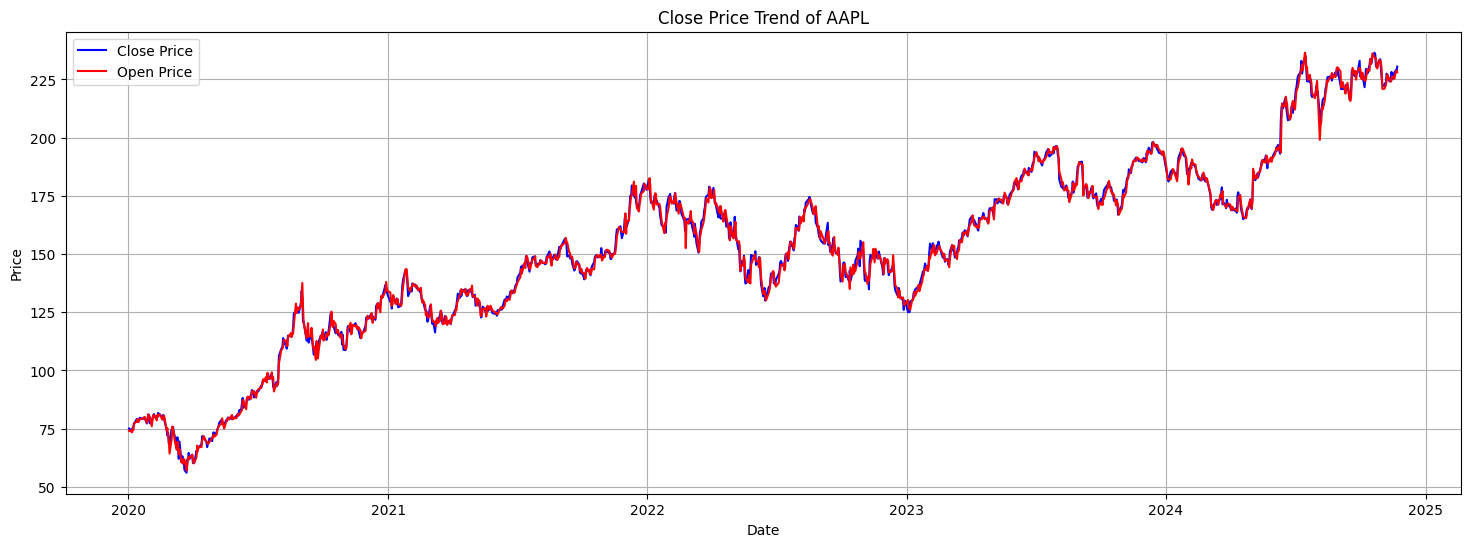

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ giá đóng cửa
plt.figure(figsize=(18, 6))
plt.plot(data.index, close_data, label='Close Price', color='blue')  # Sử dụng index thay vì cột 'Date'
plt.plot(data.index, open_data, label='Open Price', color='red')
plt.title('Close Price Trend of AAPL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add trace for 'Close Price'
fig.add_trace(go.Scatter(x=data.index, y=close_data, mode='lines', name='Close Price'))

# Add trace for 'Open Price' (correct the name and the color setting)
fig.add_trace(go.Scatter(x=data.index, y=open_data, mode='lines', name='Open Price', line=dict(color='red')))

# Update layout with titles for axes and plot
fig.update_layout(title="Close Price Trend of AAPL", 
                  xaxis_title="Date", 
                  yaxis_title="Price")

# Show the plot
fig.show()


Trung bình khối lượng giao dịch: 91438783.64720194
Ngày có khối lượng giao dịch cao nhất: 2020-02-28 00:00:00 (426510000)
Ngày có khối lượng giao dịch thấp nhất: 2024-11-22 00:00:00 (16368337)


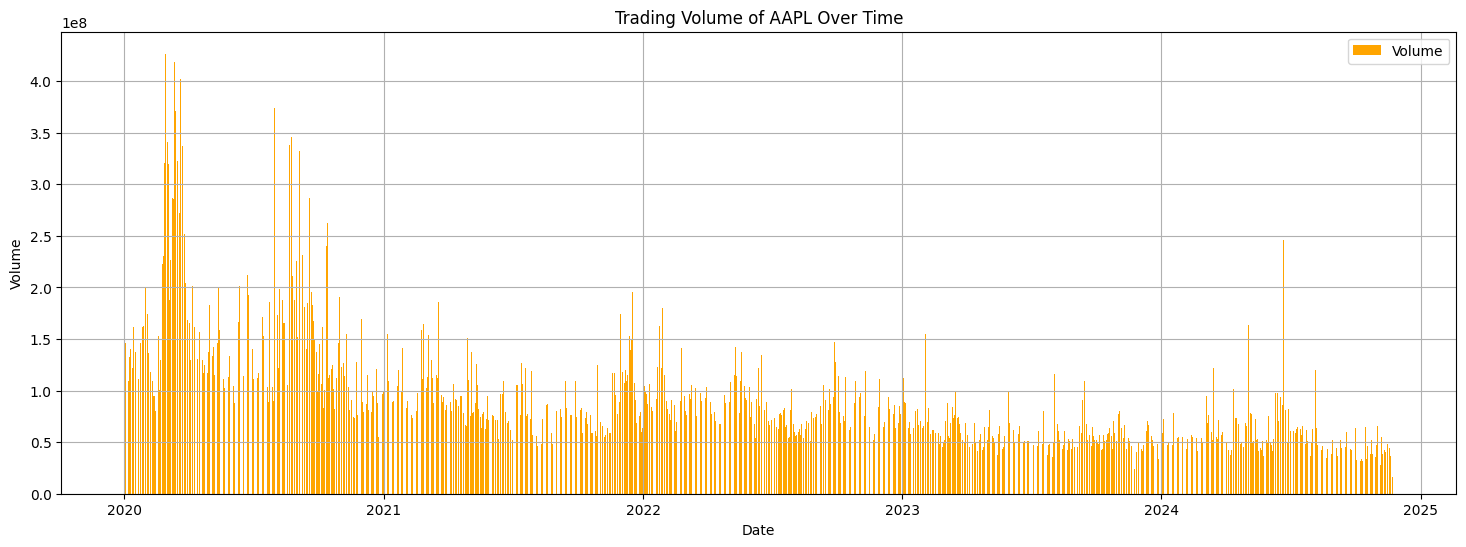

In [ ]:
import matplotlib.pyplot as plt

# Tính trung bình khối lượng giao dịch
average_volume = volume_data.mean()
print(f"Trung bình khối lượng giao dịch: {average_volume}")

# Ngày có khối lượng giao dịch cao nhất và thấp nhất
max_volume = volume_data.max()
min_volume = volume_data.min()

max_date = volume_data.idxmax()
min_date = volume_data.idxmin()

print(f"Ngày có khối lượng giao dịch cao nhất: {max_date} ({max_volume})")
print(f"Ngày có khối lượng giao dịch thấp nhất: {min_date} ({min_volume})")

# Vẽ biểu đồ khối lượng giao dịch theo thời gian
plt.figure(figsize=(18, 6))
plt.bar(data.index, volume_data, color='orange', label='Volume')
plt.title('Trading Volume of AAPL Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=close_data, mode='lines', name='Close Price'))
fig.update_layout(title="Close Price Trend of AAPL", xaxis_title="Date", yaxis_title="Price")
fig.show()


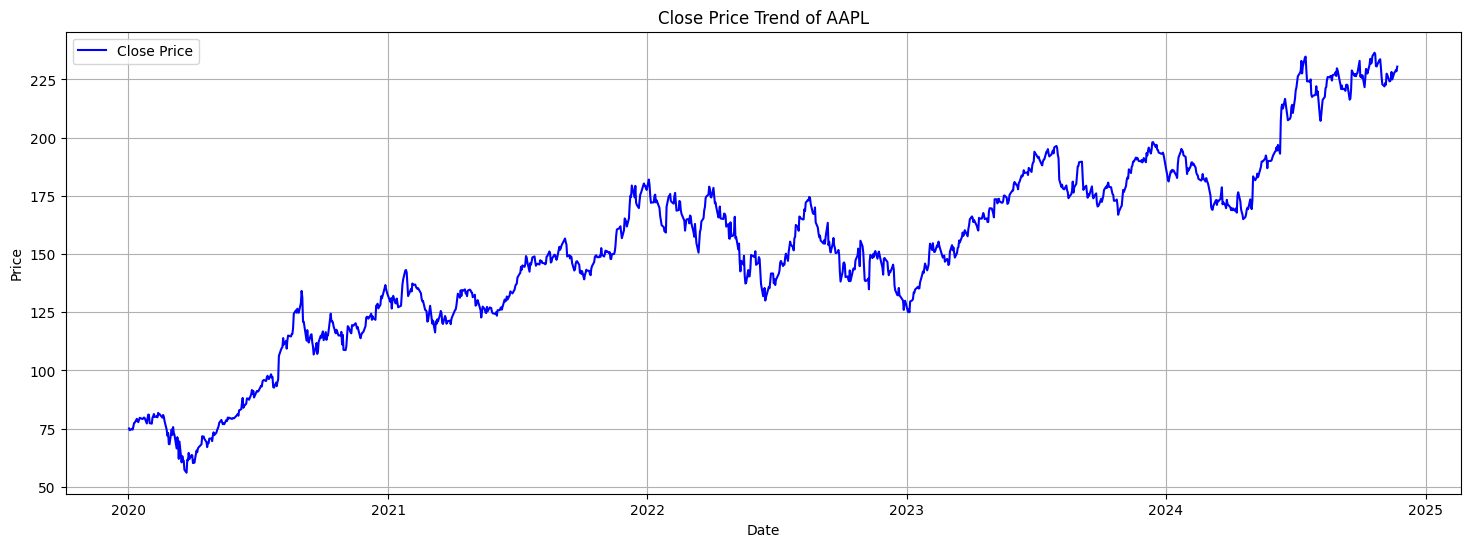

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ giá đóng cửa
plt.figure(figsize=(18, 6))
plt.plot(data.index, close_data, label='Close Price', color='blue')  # Sử dụng index thay vì cột 'Date'
plt.title('Close Price Trend of AAPL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()
